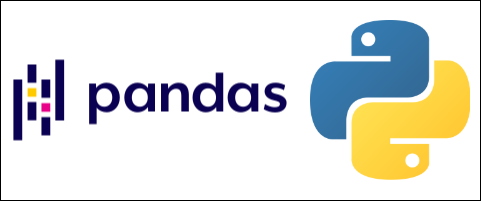

##**Getting Started: Let's First import Pandas library**

In [ ]:
import pandas as pd
import numpy as np
import copy

###Before we begin with pandas, we would need to import the file

###**Our goal in this session is to find the most nutritious cereal under each brand.**

Link to the dataset being used : https://www.kaggle.com/datasets/crawford/80-cereals

In [ ]:
df = pd.read_csv('https://gist.githubusercontent.com/KarthickKrishnaM/67e6699be86f5b007d444f7235d18888/raw/938f0a62b669c69c237cb5d2f957d6730aed0f43/cereal.csv') #here we name this as a dataframe.

Note that pandas offers ways to read into excel and text files also.

But for the sake of this session we are sticking with CSV.





---



##**More Commands in Pandas**

In [ ]:
list(df.columns) #as the name suggests, it provides the name of all the columns in the DataFrame.

['name',
 'mfr',
 'type',
 'calories',
 'protein',
 'fat',
 'sodium',
 'fiber',
 'carbo',
 'sugars',
 'potass',
 'vitamins',
 'shelf',
 'weight',
 'cups',
 'rating']

Now let's try and access rows of a particular column

we can play around with the cell below too

In [ ]:
df["name"][1 : 3] #The final value is exclusive, remember that!

1    100% Natural Bran
2             All-Bran
Name: name, dtype: object

Now you'd have noticed that there is abbreviations in the columns of the dataset, which makes it tough for viewing.

Let's rename the columns.

In [ ]:
df.rename(columns={"mfr" : "Manufacturer", "potass":"Potassium", "carbo":"Carbohydrates"},inplace = True)


##**Question : What is the "inplace = True" placed there for?**




> It's there to save memory in large scale applications, wherein it will directly discard the old DF and make way for the new one.


Now that we have our Cereal columns sorted in place, Let's have another look at this dataset:


In [ ]:
df

,name,Manufacturer,type,calories,protein,fat,sodium,fiber,Carbohydrates,sugars,Potassium,vitamins,shelf,weight,cups,rating
0,100% Bran,N,C,70,4,1,130,10.0,5.0,6,280,25,3,1.0,0.33,68.402973
1,100% Natural Bran,Q,C,120,3,5,15,2.0,8.0,8,135,0,3,1.0,1.00,33.983679
2,All-Bran,K,C,70,4,1,260,9.0,7.0,5,320,25,3,1.0,0.33,59.425505
3,All-Bran with Extra Fiber,K,C,50,4,0,140,14.0,8.0,0,330,25,3,1.0,0.50,93.704912
4,Almond Delight,R,C,110,2,2,200,1.0,14.0,8,-1,25,3,1.0,0.75,34.384843
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72,Triples,G,C,110,2,1,250,0.0,21.0,3,60,25,3,1.0,0.75,39.106174
73,Trix,G,C,110,1,1,140,0.0,13.0,12,25,25,2,1.0,1.00,27.753301
74,Wheat Chex,R,C,100,3,1,230,3.0,17.0,3,115,25,1,1.0,0.67,49.787445
75,Wheaties,G,C,100,3,1,200,3.0,17.0,3,110,25,1,1.0,1.00,51.592193


Notice that the author of this dataset has gone deep into the abreviations.

let's expand them to make it easy for the viewer.

A = American Home Food Products

G = General Mills

K = Kelloggs

N = Nabisco

P = Post

Q = Quaker Oats

R = Ralston Purina

This is the reference code for the type column.

df.loc[df['type']==X, 'type'] = Y checks if the entry in the 'type column' is a certain value, and then conditionally assigns a value to a column, here back to 'type'

In [ ]:
df.loc[df['type'] == 'C', 'type'] = 'Cold' #taking care of the type column.
df.loc[df["type"]=="H", 'type'] = 'Hot' #assign Hot to type

df.loc[df["Manufacturer"]=='N',"Manufacturer"]="Nabisco"
df.loc[df["Manufacturer"]=='A', "Manufacturer"] = "American Home Food Products" #assign "American Home Food Products" to manufacturer
df.loc[df["Manufacturer"]=='K', "Manufacturer"]= "Kelloggs"   #  "Kelloggs"
df.loc[df["Manufacturer"]=='G',"Manufacturer" ]= "General Mills"#"General Mills"
df.loc[df["Manufacturer"]=='P',"Manufacturer" ]= "Post" #"Post"
df.loc[df["Manufacturer"]== 'Q',"Manufacturer"] = "Quaker Oats" #if Manufacturer is Q, make it Quaker Oats
df.loc[df["Manufacturer"] == 'R', "Manufacturer"] = "Ralston Purina" #if Manufacturer is R, make it Ralston Purina
#taking care of expanding the "manufacturer" Column





In [ ]:
df

,name,Manufacturer,type,calories,protein,fat,sodium,fiber,Carbohydrates,sugars,Potassium,vitamins,shelf,weight,cups,rating
0,100% Bran,Nabisco,Cold,70,4,1,130,10.0,5.0,6,280,25,3,1.0,0.33,68.402973
1,100% Natural Bran,Quaker Oats,Cold,120,3,5,15,2.0,8.0,8,135,0,3,1.0,1.00,33.983679
2,All-Bran,Kelloggs,Cold,70,4,1,260,9.0,7.0,5,320,25,3,1.0,0.33,59.425505
3,All-Bran with Extra Fiber,Kelloggs,Cold,50,4,0,140,14.0,8.0,0,330,25,3,1.0,0.50,93.704912
4,Almond Delight,Ralston Purina,Cold,110,2,2,200,1.0,14.0,8,-1,25,3,1.0,0.75,34.384843
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72,Triples,General Mills,Cold,110,2,1,250,0.0,21.0,3,60,25,3,1.0,0.75,39.106174
73,Trix,General Mills,Cold,110,1,1,140,0.0,13.0,12,25,25,2,1.0,1.00,27.753301
74,Wheat Chex,Ralston Purina,Cold,100,3,1,230,3.0,17.0,3,115,25,1,1.0,0.67,49.787445
75,Wheaties,General Mills,Cold,100,3,1,200,3.0,17.0,3,110,25,1,1.0,1.00,51.592193


Pay attention to the fact that we are using the "loc" function, which is based on locating based on labels of the rows and columns.

It's cousin, "iloc" is used to reference and access elements using integers.

In [ ]:
#df.iloc[1,5] #A particular coordinate
df.iloc[1:4] #A particular range of rows
#play with this for a while

,name,Manufacturer,type,calories,protein,fat,sodium,fiber,Carbohydrates,sugars,Potassium,vitamins,shelf,weight,cups,rating
1,100% Natural Bran,Quaker Oats,Cold,120,3,5,15,2.0,8.0,8,135,0,3,1.0,1.00,33.983679
2,All-Bran,Kelloggs,Cold,70,4,1,260,9.0,7.0,5,320,25,3,1.0,0.33,59.425505
3,All-Bran with Extra Fiber,Kelloggs,Cold,50,4,0,140,14.0,8.0,0,330,25,3,1.0,0.50,93.704912


Now let's say that we want to find all the cereals that are made by Kelloggs in this list.

How does Pandas help us with that?

In [ ]:
(df.loc[df["Manufacturer"]=="Kelloggs"])
#play again

,name,Manufacturer,type,calories,protein,fat,sodium,fiber,Carbohydrates,sugars,Potassium,vitamins,shelf,weight,cups,rating
2,All-Bran,Kelloggs,Cold,70,4,1,260,9.0,7.0,5,320,25,3,1.00,0.33,59.425505
3,All-Bran with Extra Fiber,Kelloggs,Cold,50,4,0,140,14.0,8.0,0,330,25,3,1.00,0.50,93.704912
6,Apple Jacks,Kelloggs,Cold,110,2,0,125,1.0,11.0,14,30,25,2,1.00,1.00,33.174094
16,Corn Flakes,Kelloggs,Cold,100,2,0,290,1.0,21.0,2,35,25,1,1.00,1.00,45.863324
17,Corn Pops,Kelloggs,Cold,110,1,0,90,1.0,13.0,12,20,25,2,1.00,1.00,35.782791
19,Cracklin' Oat Bran,Kelloggs,Cold,110,3,3,140,4.0,10.0,7,160,25,3,1.00,0.50,40.448772
21,Crispix,Kelloggs,Cold,110,2,0,220,1.0,21.0,3,30,25,3,1.00,1.00,46.895644
24,Froot Loops,Kelloggs,Cold,110,2,1,125,1.0,11.0,13,30,25,2,1.00,1.00,32.207582
25,Frosted Flakes,Kelloggs,Cold,110,1,0,200,1.0,14.0,11,25,25,1,1.00,0.75,31.435973
26,Frosted Mini-Wheats,Kelloggs,Cold,100,3,0,0,3.0,14.0,7,100,25,2,1.00,0.80,58.345141


The interesting thing about this is that we can take multiple booleans like this and display the final output.

Now that we learnt how to seperate by brand, let's work on sorting by brand.

df.sort_values(\<column_name>,ascending = True/False) is used sort a dataframe on this basis of values of a certain given column \\
Eg: - df.sort_values(["A"],ascending = True) is used to sort the dataframe on this basis of  the values of the column "A"

In [ ]:
df2 = df.loc[df["Manufacturer"]=="Kelloggs"] #creates a seperate dataframe that contains only Kelloggs info.
df2.sort_values(["fiber"],ascending = False)#write code here to sort all data in df2 based on fiber values, in descending order.



,name,Manufacturer,type,calories,protein,fat,sodium,fiber,Carbohydrates,sugars,Potassium,vitamins,shelf,weight,cups,rating
3,All-Bran with Extra Fiber,Kelloggs,Cold,50,4,0,140,14.0,8.0,0,330,25,3,1.00,0.50,93.704912
2,All-Bran,Kelloggs,Cold,70,4,1,260,9.0,7.0,5,320,25,3,1.00,0.33,59.425505
58,Raisin Bran,Kelloggs,Cold,120,3,1,210,5.0,14.0,12,240,25,2,1.33,0.75,39.259197
28,Fruitful Bran,Kelloggs,Cold,120,3,0,240,5.0,14.0,12,190,25,3,1.33,0.67,41.015492
19,Cracklin' Oat Bran,Kelloggs,Cold,110,3,3,140,4.0,10.0,7,160,25,3,1.00,0.50,40.448772
46,Mueslix Crispy Blend,Kelloggs,Cold,160,3,2,150,3.0,17.0,13,160,25,3,1.50,0.67,30.313351
50,Nutri-grain Wheat,Kelloggs,Cold,90,3,0,170,3.0,18.0,2,90,25,3,1.00,1.00,59.642837
49,Nutri-Grain Almond-Raisin,Kelloggs,Cold,140,3,2,220,3.0,21.0,7,130,25,3,1.33,0.67,40.692320
26,Frosted Mini-Wheats,Kelloggs,Cold,100,3,0,0,3.0,14.0,7,100,25,2,1.00,0.80,58.345141
60,Raisin Squares,Kelloggs,Cold,90,2,0,0,2.0,15.0,6,110,25,3,1.00,0.50,55.333142


Now as we saw with the dataset, the amount of Hot cereal is less than the amount of cold cereal, so let's say we want to only look at the hot cereal...

In [ ]:
#df.loc[(df["type"]=="Hot")] #any logical operator that returns a boolean value can be used here.
df.loc[(df["type"]=="Cold") & (df["protein"]>=4)]
#play with this for a while

,name,Manufacturer,type,calories,protein,fat,sodium,fiber,Carbohydrates,sugars,Potassium,vitamins,shelf,weight,cups,rating
0,100% Bran,Nabisco,Cold,70,4,1,130,10.0,5.0,6,280,25,3,1.0,0.33,68.402973
2,All-Bran,Kelloggs,Cold,70,4,1,260,9.0,7.0,5,320,25,3,1.0,0.33,59.425505
3,All-Bran with Extra Fiber,Kelloggs,Cold,50,4,0,140,14.0,8.0,0,330,25,3,1.0,0.50,93.704912
11,Cheerios,General Mills,Cold,110,6,2,290,2.0,17.0,1,105,25,1,1.0,1.25,50.764999
41,Life,Quaker Oats,Cold,100,4,2,150,2.0,12.0,6,95,25,2,1.0,0.67,45.328074
44,Muesli Raisins; Dates; & Almonds,Ralston Purina,Cold,150,4,3,95,3.0,16.0,11,170,25,3,1.0,1.00,37.136863
45,Muesli Raisins; Peaches; & Pecans,Ralston Purina,Cold,150,4,3,150,3.0,16.0,11,170,25,3,1.0,1.00,34.139765
56,Quaker Oat Squares,Quaker Oats,Cold,100,4,1,135,2.0,14.0,6,110,25,3,1.0,0.50,49.511874
67,Special K,Kelloggs,Cold,110,6,0,230,1.0,16.0,3,55,25,1,1.0,1.00,53.131324




Now let's do one thing, let's sort data by amount of sugar present, and classify based on brand.

Cascading operations,you can apply methods to a modified dataframe obtained by applying a method itself

In [ ]:
df3 = df.loc[(df["sugars"]>8)].sort_values(["sugars"], ascending = False)
#play with this

In [ ]:
df3

,name,Manufacturer,type,calories,protein,fat,sodium,fiber,Carbohydrates,sugars,Potassium,vitamins,shelf,weight,cups,rating
66,Smacks,Kelloggs,Cold,110,2,1,70,1.0,9.0,15,40,25,2,1.00,0.75,31.230054
30,Golden Crisp,Post,Cold,100,2,0,45,0.0,11.0,15,40,25,1,1.00,0.88,35.252444
6,Apple Jacks,Kelloggs,Cold,110,2,0,125,1.0,11.0,14,30,25,2,1.00,1.00,33.174094
70,Total Raisin Bran,General Mills,Cold,140,3,1,190,4.0,15.0,14,230,100,3,1.50,1.00,28.592785
52,Post Nat. Raisin Bran,Post,Cold,120,3,1,200,6.0,11.0,14,260,25,3,1.33,0.67,37.840594
14,Cocoa Puffs,General Mills,Cold,110,1,1,180,0.0,12.0,13,55,25,2,1.00,1.00,22.736446
46,Mueslix Crispy Blend,Kelloggs,Cold,160,3,2,150,3.0,17.0,13,160,25,3,1.50,0.67,30.313351
18,Count Chocula,General Mills,Cold,110,1,1,180,0.0,12.0,13,65,25,2,1.00,1.00,22.396513
24,Froot Loops,Kelloggs,Cold,110,2,1,125,1.0,11.0,13,30,25,2,1.00,1.00,32.207582
73,Trix,General Mills,Cold,110,1,1,140,0.0,13.0,12,25,25,2,1.00,1.00,27.753301


In marketing applications, the name of the cereal plays a big role in increasing the appeal of the cereal.

So let's see how much common names like "Crunch" and "Bran" are used. Now how do we do this? \\

Clue: the logical operation A.str.contains("String") will check whether a certain object A contains String or not, the .str. in the middle typesets it to string

.reset_index() assigns new index values to the filtered dataframe

In [ ]:
df.loc[df["name"].str.contains("Crunch")]#check if it contains Crunch
df.loc[df["name"].str.contains("Bran")].reset_index()#bran but it also has reset_index , allows us to be more efficient when reading content.

,index,name,Manufacturer,type,calories,protein,fat,sodium,fiber,Carbohydrates,sugars,Potassium,vitamins,shelf,weight,cups,rating
0,0,100% Bran,Nabisco,Cold,70,4,1,130,10.0,5.0,6,280,25,3,1.00,0.33,68.402973
1,1,100% Natural Bran,Quaker Oats,Cold,120,3,5,15,2.0,8.0,8,135,0,3,1.00,1.00,33.983679
2,2,All-Bran,Kelloggs,Cold,70,4,1,260,9.0,7.0,5,320,25,3,1.00,0.33,59.425505
3,3,All-Bran with Extra Fiber,Kelloggs,Cold,50,4,0,140,14.0,8.0,0,330,25,3,1.00,0.50,93.704912
4,8,Bran Chex,Ralston Purina,Cold,90,2,1,200,4.0,15.0,6,125,25,1,1.00,0.67,49.120253
5,9,Bran Flakes,Post,Cold,90,3,0,210,5.0,13.0,5,190,25,3,1.00,0.67,53.313813
6,19,Cracklin' Oat Bran,Kelloggs,Cold,110,3,3,140,4.0,10.0,7,160,25,3,1.00,0.50,40.448772
7,28,Fruitful Bran,Kelloggs,Cold,120,3,0,240,5.0,14.0,12,190,25,3,1.33,0.67,41.015492
8,52,Post Nat. Raisin Bran,Post,Cold,120,3,1,200,6.0,11.0,14,260,25,3,1.33,0.67,37.840594
9,58,Raisin Bran,Kelloggs,Cold,120,3,1,210,5.0,14.0,12,240,25,2,1.33,0.75,39.259197


In [ ]:
df4 = copy.deepcopy(df) #ensuring that the orignal dataframe is not lost



---



To continue with our analysis of cereals, let's now **normalise** the data.

Again notice that the portion sizes of the "cups" are sometimes less than 1, thus making them look healthier than they are. Let's first normalise this.




In [ ]:
for index, rows in df4.iterrows():
  for i in range(3,14):
    df4.iloc[index,i]=((df4.iloc[index,i])/rows[14])
    df4.iloc[index,14]=1;


We can make the data easier on the eyes by Converting to integer and sorting them by descending order of calories



In [ ]:
df4.sort_values(["calories"],ascending = False)
df4

,name,Manufacturer,type,calories,protein,fat,sodium,fiber,Carbohydrates,sugars,Potassium,vitamins,shelf,weight,cups,rating
0,100% Bran,Nabisco,Cold,212.121212,12.121212,3.030303,393.939394,30.303030,15.151515,18.181818,848.484848,75.757576,9.090909,3.030303,1.0,68.402973
1,100% Natural Bran,Quaker Oats,Cold,120.000000,3.000000,5.000000,15.000000,2.000000,8.000000,8.000000,135.000000,0.000000,3.000000,1.000000,1.0,33.983679
2,All-Bran,Kelloggs,Cold,212.121212,12.121212,3.030303,787.878788,27.272727,21.212121,15.151515,969.696970,75.757576,9.090909,3.030303,1.0,59.425505
3,All-Bran with Extra Fiber,Kelloggs,Cold,100.000000,8.000000,0.000000,280.000000,28.000000,16.000000,0.000000,660.000000,50.000000,6.000000,2.000000,1.0,93.704912
4,Almond Delight,Ralston Purina,Cold,146.666667,2.666667,2.666667,266.666667,1.333333,18.666667,10.666667,-1.333333,33.333333,4.000000,1.333333,1.0,34.384843
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72,Triples,General Mills,Cold,146.666667,2.666667,1.333333,333.333333,0.000000,28.000000,4.000000,80.000000,33.333333,4.000000,1.333333,1.0,39.106174
73,Trix,General Mills,Cold,110.000000,1.000000,1.000000,140.000000,0.000000,13.000000,12.000000,25.000000,25.000000,2.000000,1.000000,1.0,27.753301
74,Wheat Chex,Ralston Purina,Cold,149.253731,4.477612,1.492537,343.283582,4.477612,25.373134,4.477612,171.641791,37.313433,1.492537,1.492537,1.0,49.787445
75,Wheaties,General Mills,Cold,100.000000,3.000000,1.000000,200.000000,3.000000,17.000000,3.000000,110.000000,25.000000,1.000000,1.000000,1.0,51.592193


Now, to finish this off, let's classify the **unhealthiest** cereal based on brands, and calculate average calories per brand.

>We do this by splitting the dataframes by brand, and then sorting them, and then proceeding to concatenate them.

Once again, brands for reference:


A = American Home Food Products

G = General Mills

K = Kelloggs

N = Nabisco

P = Post

Q = Quaker Oats

R = Ralston Purina



In [ ]:
dfkel = df4.loc[df["Manufacturer"]=="Kelloggs"]
dfg = df4.loc[df["Manufacturer"]=="General Mills"]
dfa = df4.loc[df["Manufacturer"]=="American Home Food Products"]
dfn = df4.loc[df["Manufacturer"]=="Nabisco"]
dfp = df4.loc[df["Manufacturer"]=="Post"]
dfq = df4.loc[df["Manufacturer"]=="Quaker Oats"]
dfr = df4.loc[df["Manufacturer"]=="Ralston Purina"]


df.max() and df.mean() returns the max and the mean values for a specified column of a dataframe

In [ ]:

dfkel = dfkel.loc[(dfkel["calories"]== dfkel["calories"].max())]



dfg = dfg.loc[(dfg["calories"]== dfg["calories"].max())]
dfa = dfa.loc[(dfa["calories"]== dfa["calories"].max())]
dfn = dfn.loc[(dfn["calories"]== dfn["calories"].max())]
dfp =dfp.loc[(dfp["calories"]== dfp["calories"].max())]
dfq = dfq.loc[(dfq["calories"]== dfq["calories"].max())]
dfr = dfr.loc[(dfr["calories"]== dfr["calories"].max())]

dfnet = pd.concat([dfkel,dfg,dfa,dfn,dfp,dfq,dfr], axis=0) #new

dfnet.sort_values(["calories"], ascending = False)




,name,Manufacturer,type,calories,protein,fat,sodium,fiber,Carbohydrates,sugars,Potassium,vitamins,shelf,weight,cups,rating
33,Grape-Nuts,Post,Cold,440.000000,12.000000,0.000000,680.000000,12.000000,68.000000,12.000000,360.000000,100.000000,12.000000,4.000000,1.0,53.371007
51,Oatmeal Raisin Crisp,General Mills,Cold,260.000000,6.000000,4.000000,340.000000,3.000000,27.000000,20.000000,240.000000,50.000000,6.000000,2.500000,1.0,30.450843
46,Mueslix Crispy Blend,Kelloggs,Cold,238.805970,4.477612,2.985075,223.880597,4.477612,25.373134,19.402985,238.805970,37.313433,4.477612,2.238806,1.0,30.313351
0,100% Bran,Nabisco,Cold,212.121212,12.121212,3.030303,393.939394,30.303030,15.151515,18.181818,848.484848,75.757576,9.090909,3.030303,1.0,68.402973
56,Quaker Oat Squares,Quaker Oats,Cold,200.000000,8.000000,2.000000,270.000000,4.000000,28.000000,12.000000,220.000000,50.000000,6.000000,2.000000,1.0,49.511874
44,Muesli Raisins; Dates; & Almonds,Ralston Purina,Cold,150.000000,4.000000,3.000000,95.000000,3.000000,16.000000,11.000000,170.000000,25.000000,3.000000,1.000000,1.0,37.136863
45,Muesli Raisins; Peaches; & Pecans,Ralston Purina,Cold,150.000000,4.000000,3.000000,150.000000,3.000000,16.000000,11.000000,170.000000,25.000000,3.000000,1.000000,1.0,34.139765
43,Maypo,American Home Food Products,Hot,100.000000,4.000000,1.000000,0.000000,0.000000,16.000000,3.000000,95.000000,25.000000,2.000000,1.000000,1.0,54.850917


Finally let's check the average amount of sugar and calories every manufacturer adds to their Cereals.

In [ ]:
print("Kelloggs:",dfkel.iloc[:,3].mean())

print("\nAmerican Home Food Products: \t",dfa.iloc[:,3].mean(),"\n\nNabisco: \t",dfn.iloc[:,3].mean(),"\n\nPost: \t",dfp.iloc[:,3].mean(),"\n\nQuaker: \t",dfq.iloc[:,3].mean(),"\n\nRalston Purina: \t",dfr.iloc[:,3].mean())

Kelloggs: 238.8059701492537

American Home Food Products: 	 100.0 

Nabisco: 	 212.12121212121212 

Post: 	 440.0 

Quaker: 	 200.0 

Ralston Purina: 	 150.0


To end this analysis, let's store all of what we've done in a CSV file.

In [ ]:
dfnet.to_csv('modified.csv',index= True)



---

